# Support Vector Machine trong Python

- Nguyễn Hữu Vũ 
- Nhóm nghiên cứu về AI đại học Bách Khoa Tp. Hồ Chí Minh

-dataset: https://www.kaggle.com/primaryobjects/voicegender

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('voice.csv')

## 1) Phân tích dữ liệu

In [4]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [9]:
df.shape

(3168, 21)

In [10]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [11]:
df[df['label'] == 'male'].shape

(1584, 21)

In [12]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


Thus we can see there are equal number of male and female labels

In [13]:
df.shape

(3168, 21)

## 2) Biển đổi dữ liệu

### Xác định `features` và `labels`

In [14]:
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


### Data Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()


In [17]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [18]:
gender_encoder.fit(y)
y = gender_encoder.transform(y)

In [19]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
gender_encoder.inverse_transform(y)

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

### Data Standardization


In [21]:
X.shape

(3168, 20)

In [22]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Splitting dataset into training set and testing set for better generalisation

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 3)  Sử dụng mô hình Support Vector Machine
- Chúng ta sẽ sử dụng Support Vector Classifier(SVC) của thư viện `sklearn` với các `kernel` khác nhau

#### Default kernel (=> kernel='rbf')

In [24]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters


In [25]:
svc

SVC()

- ==>  kernel='rbf' is the default

In [26]:
svc.fit(X_train,y_train)


SVC()

In [27]:
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


#### Linear kernel

In [28]:
svc=SVC(kernel='linear')


In [29]:
svc

SVC(kernel='linear')

In [30]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


#### Polynomial kernel

In [31]:
svc=SVC(kernel='poly')


In [32]:
svc

SVC(kernel='poly')

In [33]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9589905362776026


Polynomial kernel is performing poorly.The reason behind this maybe it is overfitting the training dataset

## 4) K-fold cross validation with different kernels

### a) CV on Linear kernel

In [34]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
svc

SVC(kernel='linear')

 - ==> C = 1.0

In [35]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]


We can see above how the accuracy score is different everytime.This shows that accuracy score depends upon how the datasets got split.

In [36]:
print(scores.mean())

0.9696991175178692


In K-fold cross validation we generally take the mean of all the scores.

#### Thay đổi giá trị `C`

- C is a parameter of the SVC learner and is the penalty for misclassifying a data point.
- When C is small, the classifier is okay with misclassified data points (high bias, low variance) => cause underfitting . 
- When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance) => cause overfitting .

- ==> Thus the value of C must be chosen in such a manner that it generalised the unseen data well**



In [37]:
C_range=list(range(1,26))
acc_score=[]


In [38]:
print(C_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [39]:
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164, 0.9681198338857164]


Text(0, 0.5, 'Cross-Validated Accuracy')

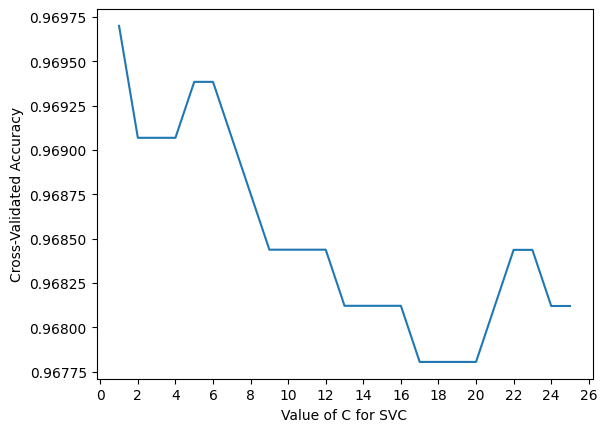

In [40]:
import matplotlib.pyplot as plt

C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

- ==> Từ biểu đồ trên ta thấy độ chính xác gần 97% cho  C=1 and C=6, sau đó rớt xuống 96.8% ...

##### Xác định giá trị `C` trong khoảng (1,6)  cho độ chính xác cao nhất

In [41]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]

In [42]:
C_range

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3000000000000003,
 1.4000000000000001,
 1.5000000000000002,
 1.6,
 1.7000000000000002,
 1.8000000000000003,
 1.9000000000000001,
 2.0,
 2.1,
 2.2,
 2.3000000000000003,
 2.4000000000000004,
 2.5000000000000004,
 2.6,
 2.7,
 2.8000000000000003,
 2.9000000000000004,
 3.0000000000000004,
 3.1,
 3.2,
 3.3000000000000003,
 3.4000000000000004,
 3.5000000000000004,
 3.6,
 3.7,
 3.8000000000000003,
 3.9000000000000004,
 4.0,
 4.1,
 4.2,
 4.3,
 4.3999999999999995,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9]

In [43]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969

Text(0, 0.5, 'Cross-Validated Accuracy')

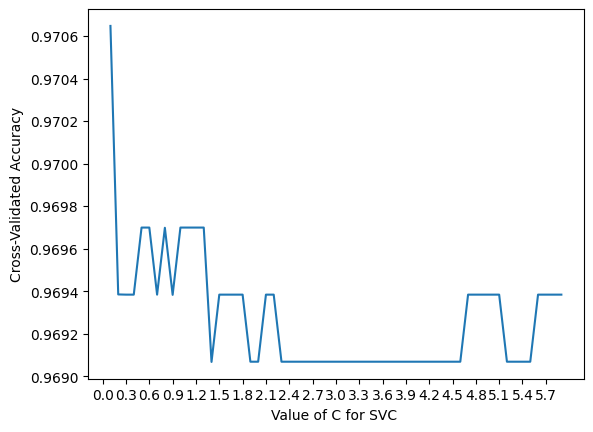

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- ==> Độ chính xác cao nhất khi `C=0.1`

### b) CV on rbf kernel

In [45]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
svc

SVC()

In [46]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]


In [47]:
print(scores.mean())

0.9665325639899376


#### Thay đổi giá trị `gamma`
- gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. - When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad.
- When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points

In [48]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744, 0.9061883560276325, 0.6016421754582119, 0.49905362776025236]


Text(0, 0.5, 'Cross-Validated Accuracy')

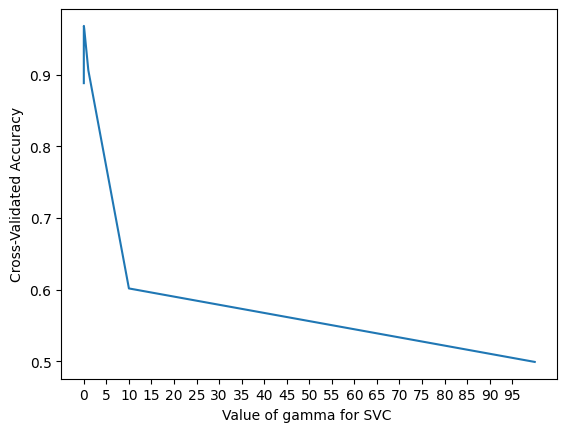

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

- ==> Ta thấy `gamma = 10` trở lên độ chính xác gảim, do đó ta sẽ tìm `gamma` cho độ chính xác cao nhất trong khoảng (0, 0.1)


In [50]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744]


Text(0, 0.5, 'Cross-Validated Accuracy')

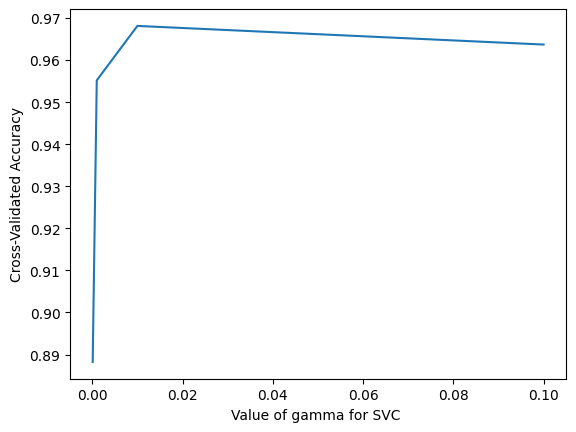

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- The score increases steadily and raches its peak at 0.01 and then decreases till gamma=1.Thus Gamma should be around 0.01.

- ==> Tiếp tục tìm giá trị `gamma` chính xác hơn

In [52]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9681168390368565, 0.9681168390368565, 0.9681148424709501, 0.9671664736652957, 0.9665325639899376]


Text(0, 0.5, 'Cross-Validated Accuracy')

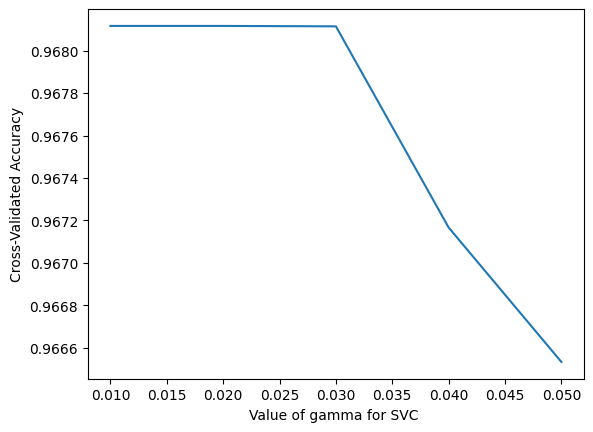

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- ==> chúng ta sẽ chọn `gamma=0.01`

#### Xây dựng model với `gamma = 0.01`

In [54]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf', gamma = 0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.92113565 0.94637224 0.97791798 0.97791798 0.95583596 0.99684543
 0.99369085 0.98107256 0.93670886 0.99367089]


In [55]:
print(scores.mean())

0.9681168390368565


- ==> ta thấy độ chính xác  tăng lên được 96.82%

### c) CV on Polynomial kernel

In [56]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
svc

SVC(kernel='poly')

In [57]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]


In [58]:
print(scores.mean())

0.9450654873617378


#### Taking polynomial kernel with different degree

In [59]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555, 0.7736463283152977]


Text(0, 0.5, 'Cross-Validated Accuracy')

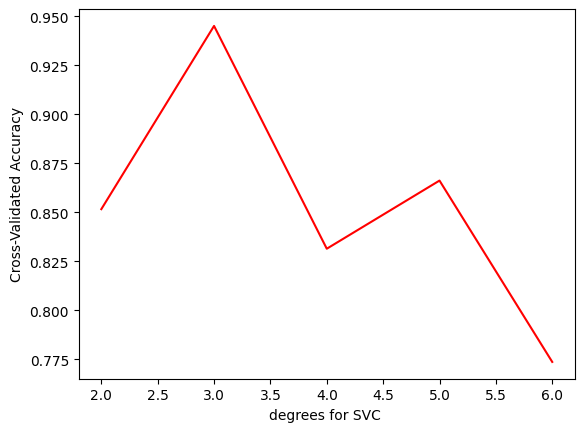

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- => Nhận xét: độ chính xác cao tạo degree = 3, sau đó giảm dần. Do đó ta có thể thấy khi `degree` tăng, mô hình càng phức tạp. càng dễ dẫn đến hiện tượng overfitting


## 5) Sử dụng 'RandomizedSearchCV`
- Tất cả các bước trên có thể đơn giản hóa bằng cách dùng `GridSearchCV` hoặc `RandomizedSearchCV`

In [61]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


kernel_options = ['linear', 'poly', 'rbf']
C_options =  np.arange(1, 10, 0.001).tolist()
gamma_options =  np.arange(1, 10, 0.001).tolist()

param_grid = dict(kernel = kernel_options, C = C_options, gamma = gamma_options)

start_time = time.time()
clf = SVC()

#param_grid : grid của các thông số cần thay đổi
random = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, cv = 10, scoring = 'accuracy')
random


RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [1.0, 1.001, 1.0019999999999998,
                                              1.0029999999999997,
                                              1.0039999999999996,
                                              1.0049999999999994,
                                              1.0059999999999993,
                                              1.0069999999999992,
                                              1.0079999999999991,
                                              1.008999999999999,
                                              1.009999999999999,
                                              1.0109999999999988,
                                              1.0119999999999987,
                                              1.0129999999999986,
                                              1.0139999999999985,
                                              1.0149999999999983,
                                              1.0159999...
                                                  1.0139999999999985,
                                                  1.0149999999999983,
                                                  1.0159999999999982,
                                                  1.0169999999999981,
                                                  1.017999999999998,
                                                  1.018999999999998,
                                                  1.0199999999999978,
                                                  1.0209999999999977,
                                                  1.0219999999999976,
                                                  1.0229999999999975,
                                                  1.0239999999999974,
                                                  1.0249999999999972,
                                                  1.0259999999999971,
                                                  1.026999999999997,
                                                  1.027999999999997,
                                                  1.0289999999999968, ...],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   scoring='accuracy')

In [62]:
clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [63]:
start_time = time.time()
random_result = random.fit(X, y)
print("Best: %f using %s" % (random.best_score_, random.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.969699 using {'kernel': 'linear', 'gamma': 5.479999999999507, 'C': 1.081999999999991}
Execution time: 13.661309719085693 ms


In [64]:
best_clf = random.best_estimator_ 

In [65]:
random.best_params_

{'kernel': 'linear', 'gamma': 5.479999999999507, 'C': 1.081999999999991}

In [66]:
random.best_score_

0.9696991175178692

##### Sử dụng mô hình tốt nhất để dự đoán kết quả cuối cùng
- Độ chính xác này khác với `random.best_score_`

In [67]:
best_clf.score(X_test, y_test)

0.9779179810725552